## 1. Preprocessing


In [1]:
"""
	Read from the Operation Sheet to get the labels
"""

import pandas as pd

file_path = './Operation-DataBase-LWM624.xlsx'  

df = pd.read_excel(file_path, skiprows=1)
print(df.columns)
project_dict = df.groupby('Sub-Project-Label')['Result ID #'].apply(list).to_dict()

def clean_key(key):
	return key.replace('-', '').replace('Schedule1', 'S1-').replace(' ', '')

def filter_values(values):
	return [int(x) for x in values if (isinstance(x, int) or x.isdigit())]

# print the dictionary
filtered_data = {
	clean_key(key): filter_values(value)
	for key, value in project_dict.items()
}
for item in filtered_data.items():
	category = item[0]
	data = item[1]
	print(f'{category:<26} number: {len(data)} range: {min(data) if data else "Nan"}~{max(data) if data else "Nan"}')
	
main_folder = './0607/'  # The folder that stores all the categorized subfolders



Index(['Date', 'Operator ', 'Sample Label#', 'Project Label',
       'Sub-Project-Label', 'Stackup#', 'Gap (mm)', 'Surface Contamination',
       'Weld Location', 'Unnamed: 9', '9+lp500', 'Diameter(um)',
       'Speed (mm/s)', 'Wobble Diameter (um)', 'Wobble-Rate(Hz)',
       'Laser Power(w)', 'Start Ramp Time(%)', 'End Ramptime(%)',
       'Unnamed: 18', 'LWM Configuration Name', 'LWM Configuration ID#',
       'Result ID #', 'Unnamed: 22', 'Plasma Software Gain',
       'Plasma Hardware Gain', 'Temp. Software Gain', 'Temp. Hardware Gain',
       'Back Ref. Software Gain', 'Back Ref. Hardware Gain', 'Comment'],
      dtype='object')
S1-                        number: 41 range: 1~41
S1-Asreceived              number: 40 range: 416~455
S1-Beamclipping0           number: 41 range: 3115~3155
S1-Beamclipping0&180       number: 41 range: 3074~3114
S1-Beamclipping180         number: 41 range: 3033~3073
S1-Cell                    number: 101 range: 190~6020
S1-Coverglasslife          number: 

In [19]:
import shutil
import os
from typing import List

def copy_files(source_path: str, destination_path: str) -> List[str]:
	"""
	Copy all files from the source directory to the destination directory
	"""
	copied_files = []
	if not os.path.exists(source_path):
		print("Source directory does not exist.")
		return copied_files

	if not os.path.exists(destination_path):
		os.makedirs(destination_path)
		print(f"Destination directory '{destination_path}' created.")
	files = [file for file in os.listdir(source_path) if os.path.isfile(os.path.join(source_path, file))]

	# copy file to the destination directory
	for file in files:
		src_file_path = os.path.join(source_path, file)
		dst_file_path = os.path.join(destination_path, file)
		try:
			shutil.copy(src_file_path, dst_file_path)
			copied_files.append(file)
			print(f"Copied '{file}' to '{destination_path}'")
		except IOError as e:
			print(f"Could not copy {file}. Error: {e}")
	print("Files have been copied.")
	return copied_files

def list_subfolders(main_folder):
	subfolders = [f.name for f in os.scandir(main_folder) if f.is_dir()]
	return subfolders

source_folder = './06_04_24 _ result IDs 5634 - 6157 - Part 2/'  # The new received folder with updated data
main_folder = './0607/'  # The folder that stores all the categorized subfolders

# Move all the updated data into the destination folder
for s in list_subfolders(source_folder):
	source_directory = os.path.join(source_folder,s)
	main_folder = './0608/'
	copied = copy_files(source_directory, main_folder)
	
# Categorize the new data into the according subfolders for GM's convenience when check the data
# If there is any .csv file left in the main folder, then a mismatch between the information sheet and updated data exists 
for sub_project_label, sample_labels in filtered_data.items():
	subfolder_path = os.path.join(main_folder, sub_project_label)
	if not os.path.exists(subfolder_path):
		os.makedirs(subfolder_path)
	# move the files to the subfolders
	for sample_label in sample_labels:
		sample_file = os.path.join(main_folder, f"{sample_label}.csv")  # The received data is in .csv
		if os.path.exists(sample_file):
			shutil.move(sample_file, subfolder_path)

print("Files have been moved")

Destination directory './0608/' created.
Copied '6021.csv' to './0608/'
Copied '6022.csv' to './0608/'
Copied '6023.csv' to './0608/'
Copied '6024.csv' to './0608/'
Copied '6025.csv' to './0608/'
Copied '6026.csv' to './0608/'
Copied '6027.csv' to './0608/'
Copied '6028.csv' to './0608/'
Copied '6029.csv' to './0608/'
Copied '6030.csv' to './0608/'
Copied '6031.csv' to './0608/'
Copied '6032.csv' to './0608/'
Copied '6033.csv' to './0608/'
Copied '6034.csv' to './0608/'
Copied '6035.csv' to './0608/'
Copied '6036.csv' to './0608/'
Copied '6037.csv' to './0608/'
Copied '6038.csv' to './0608/'
Copied '6039.csv' to './0608/'
Copied '6040.csv' to './0608/'
Copied '6041.csv' to './0608/'
Copied '6042.csv' to './0608/'
Copied '6043.csv' to './0608/'
Copied '6044.csv' to './0608/'
Copied '6045.csv' to './0608/'
Copied '6046.csv' to './0608/'
Copied '6047.csv' to './0608/'
Copied '6048.csv' to './0608/'
Copied '6049.csv' to './0608/'
Copied '6050.csv' to './0608/'
Copied '6051.csv' to './0608/

In [6]:
import os
import pandas as pd
from tqdm import tqdm

def process_data(file_path):
	df = pd.read_csv(file_path, skiprows=11, header=None)
	df = df[0].str.split(';', expand=True)
	df.columns = df.iloc[0]
	df = df.drop(df.index[0])
	df = df.apply(pd.to_numeric, errors='coerce')
	return df

def process_all_files(main_path, h5_path, selected_folders=None):
	# Open HDF5 file in write mode
	with pd.HDFStore(h5_path, mode='w') as store:
		# if selected_folders is provided, only process those folders
		subfolders_to_process = selected_folders if selected_folders else os.listdir(main_path)
		for subfolder in tqdm(subfolders_to_process,leave= False):
			subfolder_path = os.path.join(main_path, subfolder)
			print(f"Processing folder: {subfolder_path}")
			
			if os.path.isdir(subfolder_path):
					csv_files = [f for f in os.listdir(subfolder_path) if f.endswith('.csv')]
					# process each file and store it in the HDF5 file
					for filename in csv_files:
						file_path = os.path.join(subfolder_path, filename)
						df = process_data(file_path)
						sample_id = filename.replace('.csv', '')
						key = f'{subfolder}/id_{sample_id}'
						store.put(key, df, format='table', complevel=9, complib='blosc')

	print(f"All data has been successfully saved to {h5_path}")

database_h5 = "LWM_Database_Processed.h5"
processed_file = os.path.join(main_folder, database_h5)  # path for the HDF5 file

selected_folders = os.listdir(main_folder)  # process all folders under main_folder
#selected_folders = [] # to choose the certain folders
process_all_files(main_folder, processed_file, selected_folders=selected_folders)


  0%|          | 0/168 [00:00<?, ?it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-Asreceived'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/6021.csv
Processing folder: ./0608/6022.csv
Processing folder: ./0608/6023.csv
Processing folder: ./0608/6024.csv
Processing folder: ./0608/6025.csv
Processing folder: ./0608/6026.csv
Processing folder: ./0608/6027.csv
Processing folder: ./0608/6028.csv
Processing folder: ./0608/6029.csv
Processing folder: ./0608/6030.csv
Processing folder: ./0608/6031.csv
Processing folder: ./0608/6032.csv
Processing folder: ./0608/6033.csv
Processing folder: ./0608/6034.csv
Processing folder: ./0608/6035.csv
Processing folder: ./0608/6036.csv
Processing folder: ./0608/6037.csv
Processing folder: ./0608/6038.csv
Processing folder: ./0608/6039.csv
Processing folder: ./0608/6040.csv
Processing folder: ./0608/6041.csv
Processing folder: ./0608/6042.csv
Processing folder: ./0608/6043.csv
Processing folder: ./0608/6044.csv
Processing folder: ./0608/6045.csv
Processing folder: ./0608/6046.csv
Processing folder: ./0608/6047.csv
Processing folder: ./0608/6048.csv
Processing folder: .

 73%|███████▎  | 122/168 [00:04<00:01, 24.95it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-contaminatedglass2'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-Beamclipping0
Processing folder: ./0608/S1-Beamclipping0&180
Processing folder: ./0608/S1-Beamclipping180
Processing folder: ./0608/S1-Cell
Processing folder: ./0608/S1-contaminatedglass2


 76%|███████▌  | 127/168 [00:09<00:03, 10.76it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-contaminatedglass4'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-contaminatedglass4


 77%|███████▋  | 129/168 [00:14<00:06,  6.08it/s]

Processing folder: ./0608/S1-Coverglasslife
Processing folder: ./0608/S1-Crossjet40
Processing folder: ./0608/S1-Defocus+1
Processing folder: ./0608/S1-Defocus+2
Processing folder: ./0608/S1-Defocus1
Processing folder: ./0608/S1-Defocus2
Processing folder: ./0608/S1-Edgeweld
Processing folder: ./0608/S1-gap0.1
Processing folder: ./0608/S1-gap0.2


c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-gap0.2'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
 82%|████████▏ | 137/168 [00:19<00:07,  4.32it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-gap0.2ramp'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-gap0.2ramp


 82%|████████▏ | 138/168 [00:24<00:10,  2.85it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-Gap0.4'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-Gap0.4


 83%|████████▎ | 139/168 [00:26<00:11,  2.49it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-gap0.4ramp'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-gap0.4ramp


 83%|████████▎ | 140/168 [00:28<00:13,  2.13it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-gap0.8'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-gap0.8


 84%|████████▍ | 141/168 [00:29<00:14,  1.81it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-gap0.8ramp'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-gap0.8ramp


 85%|████████▍ | 142/168 [00:31<00:17,  1.52it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-LP500'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-LP500


 85%|████████▌ | 143/168 [00:33<00:19,  1.27it/s]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-LP800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-LP500&Asreceived
Processing folder: ./0608/S1-LP800


 86%|████████▋ | 145/168 [00:38<00:26,  1.17s/it]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-No_Top_Sheet'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-LP800&Defocus+2
Processing folder: ./0608/S1-LP800&Edgeweld
Processing folder: ./0608/S1-LP800&gap0.4
Processing folder: ./0608/S1-LP800&gap0.8
Processing folder: ./0608/S1-No_Top_Sheet


 89%|████████▉ | 150/168 [00:43<00:19,  1.08s/it]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-oil'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-No_Top_Sheet_TypeII
Processing folder: ./0608/S1-oil


 90%|█████████ | 152/168 [00:48<00:21,  1.37s/it]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-oilhalf'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-oilhalf


 91%|█████████ | 153/168 [00:52<00:27,  1.82s/it]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-S120'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-S120


 92%|█████████▏| 154/168 [00:57<00:32,  2.29s/it]c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'S1-S80'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Processing folder: ./0608/S1-S80


Processing folder: ./0608/S1-ShieldgasAr10
Processing folder: ./0608/S1-ShieldgasAr2
Processing folder: ./0608/S1-ShieldgasAr6
Processing folder: ./0608/S1-ShieldgasNi10
Processing folder: ./0608/S1-ShieldgasNi2
Processing folder: ./0608/S1-ShieldgasNi6
Processing folder: ./0608/S1-weldoverplastic
Processing folder: ./0608/S1-weldoverrivetandplastic
Processing folder: ./0608/S1-wobbleAmp160
Processing folder: ./0608/S1-wobbleAmp560
Processing folder: ./0608/S1-wobbleAmp720
Processing folder: ./0608/S1-wobbleFreq1700
Processing folder: ./0608/S1-wobbleFreq900
All data has been successfully saved to ./0608/LWM_Database_Processed.h5


In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from FeatureExtraction import FeatureExtraction
from scipy import signal

# path of folder for storing feature files
# Features from each class will be stored in a single .npy file separately
feature_folder = 'features_test'
if not os.path.exists(feature_folder):
        os.makedirs(feature_folder)
        
def lowpass_filter(noise_data, cutoff, sample_rate, order=4):
    rate = sample_rate * 0.5
    normal_cutoff = cutoff / rate
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    clear_data = signal.filtfilt(b, a, noise_data) 
    return clear_data

with pd.HDFStore(os.path.join(main_folder, database_h5), 'r') as hdf:
    # extract subfolders
    keys = hdf.keys()
    selected_subfolders = list(set(key.split('/')[1] for key in keys))
    for subfolder in selected_subfolders:
        subfolder_keys = [key for key in keys if key.startswith(f'/{subfolder}/')]
        print(f"Processing {subfolder}")
        num_ts = len(subfolder_keys)  # number of time series in the subfolder
        print(f"Number of time series: {num_ts}")
        param_matrices = []
        title_list_raw = ['Plas-Raw', 'T-Raw', 'R-Raw']
        feature_list = ['avg', 'RMS', 'std', 'skew', 'kurtosis', 'crest', 'latitude', 'shapeF', 'impulse', 'mean_freq',
                        'avg_freq', 'stabilization', 'variability', 'skew_freq', 'kurtosis_freq', 'RMS_freq', 'w1', 'w1', 'w1', 'w1', 'w1', 'w1', 'w1',
                        'fdavg', 'fdRMS', 'fdstd', 'fdskew', 'fdkurtosis', 'fdcrest', 'fdlatitude', 'fdshapeF', 'fdimpulse',
                        'sdavg', 'sdRMS', 'sdstd', 'sdskew', 'sdkurtosis', 'sdcrest', 'sdlatitude', 'sdshapeF', 'sdimpulse']
        num_param = len(title_list_raw)
        for _ in range(num_param):
            zero_mat = np.zeros((num_ts, len(feature_list)))
            param_matrices.append(zero_mat)

        # transverse over each sample (dataset) in the subfolder
        for file_counter, sample_key in enumerate(tqdm(subfolder_keys, desc=f"Processing Samples in {subfolder}")):
            df = hdf.get(sample_key)
            for para_counter, signal_sele in enumerate(title_list_raw):
                plasma_Raw_series1 = df[signal_sele]
                highcut = 200  # stop frequency of lowpass filter
                rate = 50 * 1000  # sampling rate
                plasma_Normal_signal = lowpass_filter(plasma_Raw_series1, highcut, rate)
                plasma_Normal_signal = plasma_Normal_signal[150:]

                # use the FeatureExtraction class
                feature_extractor = FeatureExtraction(plasma_Normal_signal, len(plasma_Normal_signal), 0)

                # compute features only once per signal
                time_feature = feature_extractor.sig_cal()
                fre_feature = feature_extractor.fre_cal(fs=rate, nperseg=256 * 5, noverlap=128 * 5)
                wave_feature = feature_extractor.wave_cal()

                fd_signal = np.diff(plasma_Normal_signal, n=1)
                fd_feature_extractor = FeatureExtraction(fd_signal, len(fd_signal), 0)
                first_feature = fd_feature_extractor.sig_cal()

                sd_signal = np.diff(fd_signal, n=1)
                sd_feature_extractor = FeatureExtraction(sd_signal, len(sd_signal), 0)
                second_feature = sd_feature_extractor.sig_cal()

                fine_feature = np.concatenate((time_feature, fre_feature, wave_feature, first_feature, second_feature), axis=1)
                param_matrices[para_counter][file_counter, :] = fine_feature

        feature_mat = np.concatenate((param_matrices[0], param_matrices[1], param_matrices[2]), axis=1)
        save_path = f'./{feature_folder}/{subfolder}.npy'
        np.save(save_path, feature_mat)


Processing S1-LP500
Number of time series: 15


Processing Samples in S1-LP500: 100%|██████████| 15/15 [00:00<00:00, 42.28it/s]


Processing S1-S120
Number of time series: 41


Processing Samples in S1-S120: 100%|██████████| 41/41 [00:01<00:00, 40.97it/s]


Processing S1-gap0.8ramp
Number of time series: 15


Processing Samples in S1-gap0.8ramp: 100%|██████████| 15/15 [00:00<00:00, 42.63it/s]


Processing S1-gap0.2
Number of time series: 41


Processing Samples in S1-gap0.2: 100%|██████████| 41/41 [00:00<00:00, 43.01it/s]


Processing S1-gap0.4ramp
Number of time series: 15


Processing Samples in S1-gap0.4ramp: 100%|██████████| 15/15 [00:00<00:00, 43.06it/s]


Processing S1-contaminatedglass2
Number of time series: 41


Processing Samples in S1-contaminatedglass2: 100%|██████████| 41/41 [00:00<00:00, 41.38it/s]


Processing S1-LP800
Number of time series: 41


Processing Samples in S1-LP800: 100%|██████████| 41/41 [00:01<00:00, 40.85it/s]


Processing S1-gap0.2ramp
Number of time series: 41


Processing Samples in S1-gap0.2ramp: 100%|██████████| 41/41 [00:00<00:00, 42.13it/s]


Processing S1-oil
Number of time series: 41


Processing Samples in S1-oil: 100%|██████████| 41/41 [00:00<00:00, 42.05it/s]


Processing S1-oilhalf
Number of time series: 41


Processing Samples in S1-oilhalf: 100%|██████████| 41/41 [00:00<00:00, 43.43it/s]


Processing S1-S80
Number of time series: 41


Processing Samples in S1-S80: 100%|██████████| 41/41 [00:01<00:00, 39.75it/s]


Processing S1-No_Top_Sheet
Number of time series: 41


Processing Samples in S1-No_Top_Sheet: 100%|██████████| 41/41 [00:00<00:00, 42.10it/s]


Processing S1-Gap0.4
Number of time series: 15


Processing Samples in S1-Gap0.4: 100%|██████████| 15/15 [00:00<00:00, 43.12it/s]


Processing S1-Asreceived
Number of time series: 41


Processing Samples in S1-Asreceived: 100%|██████████| 41/41 [00:00<00:00, 42.76it/s]


Processing S1-gap0.8
Number of time series: 15


Processing Samples in S1-gap0.8: 100%|██████████| 15/15 [00:00<00:00, 38.95it/s]


Processing S1-contaminatedglass4
Number of time series: 41


Processing Samples in S1-contaminatedglass4: 100%|██████████| 41/41 [00:00<00:00, 42.26it/s]


## 2.PCA

In [21]:
# the feature file name
file_names = [
"Highpower&Defocus+2.npy",
"Highpower&Edgeweld.npy",
"Highpower&Gap0.4.npy",
"Highpower&Gap0.8.npy",
"Lowpower&Asreceived.npy",
"Mix-Gap_0.2.npy",
"Mix-Gap_0.2_Ramp.npy",
"Mix-Gap_0.4.npy",
"Mix-Gap_0.4_Ramp.npy",
"Mix-Gap_0.8.npy",
"Mix-Gap_0.8_Ramp.npy",
"Mix-LP500.npy",
"Mix-LP800.npy",
"Mix-No_TopSheet.npy",
"Mix-Speed_120.npy",
"Mix-Speed_80.npy",
"S1-.npy",
"S1-Asreceived.npy",
"S1-Beamclipping0&180.npy",
"S1-Beamclipping0.npy",
"S1-Beamclipping180.npy",
"S1-Cell.npy",
"S1-contaminated2.npy",
"S1-contaminated4.npy",
"T1-No_Top_Sheet.npy",
"S1-Crossjet40.npy",
"S1-Defocus+1.npy",
"S1-Defocus+2.npy",
"S1-Defocus-1.npy",
"S1-Defocus-2.npy",
"S1-Edgeweld.npy",
"T1-SheildgasNi2.npy",
"S1-No_Top_Sheet.npy",
"S1-No_Top_Sheet_TypeII.npy",
"S1-oil.npy",
"S1-oilhalf.npy",
"S1-ShieldgasAr10.npy",
"S1-ShieldgasAr2.npy",
"S1-ShieldgasAr6.npy",
"S1-ShieldgasNi10.npy",
"S1-ShieldgasNi2.npy",
"S1-ShieldgasNi6.npy",
"S1-weldoverplastic.npy",
"S1-weldoverrivetandplastic.npy",
"S1-wobbleAmp160.npy",
"S1-wobbleAmp560.npy",
"S1-wobbleAmp720.npy",
"S1-wobbleFreq1700.npy",
"S1-wobbleFreq900.npy",
"S1-gap0.2.npy",
"S1-gap0.2ramp.npy",
"S1-Gap0.4.npy",
"S1-gap0.4ramp.npy",
"S1-gap0.8.npy",
"S1-gap0.8ramp.npy",
"S1-LP500.npy",
"S1-LP800.npy",
"S1-S120.npy",
"S1-S80.npy",
"T1-Cell.npy",
"T1-Defocus-2.npy",
"T1-Gap0.1.npy",
"T1-Gap0.4.npy",
"T1-Gap0.4ramp.npy",
"T1-Gap0.8.npy",
"T1-Gap0.8ramp.npy",
"T1-LP500.npy",
"New-S1.npy",
"New-Asreceived.npy"   
]

# The dictionary to hold the features
variables = {}
feature_folder = 'Good_features4'
# loop over the file names, and load the .npy files and assign them to variables
for file_name in file_names:
    variable_name = file_name.replace('.npy', '')
    file_path = os.path.join(feature_folder, file_name)
    variables[variable_name] = np.load(file_path)

# Print information
variables_info = {name: var.shape for name, var in variables.items()}
for ii, index in enumerate(variables_info.items()):
    print(ii,index)

0 ('Highpower&Defocus+2', (41, 123))
1 ('Highpower&Edgeweld', (41, 123))
2 ('Highpower&Gap0.4', (41, 123))
3 ('Highpower&Gap0.8', (41, 123))
4 ('Lowpower&Asreceived', (41, 123))
5 ('Mix-Gap_0.2', (41, 123))
6 ('Mix-Gap_0.2_Ramp', (41, 123))
7 ('Mix-Gap_0.4', (16, 123))
8 ('Mix-Gap_0.4_Ramp', (15, 123))
9 ('Mix-Gap_0.8', (15, 123))
10 ('Mix-Gap_0.8_Ramp', (15, 123))
11 ('Mix-LP500', (15, 123))
12 ('Mix-LP800', (42, 123))
13 ('Mix-No_TopSheet', (15, 123))
14 ('Mix-Speed_120', (41, 123))
15 ('Mix-Speed_80', (41, 123))
16 ('S1-', (41, 123))
17 ('S1-Asreceived', (41, 123))
18 ('S1-Beamclipping0&180', (41, 123))
19 ('S1-Beamclipping0', (41, 123))
20 ('S1-Beamclipping180', (41, 123))
21 ('S1-Cell', (49, 123))
22 ('S1-contaminated2', (41, 123))
23 ('S1-contaminated4', (41, 123))
24 ('T1-No_Top_Sheet', (28, 123))
25 ('S1-Crossjet40', (41, 123))
26 ('S1-Defocus+1', (42, 123))
27 ('S1-Defocus+2', (41, 123))
28 ('S1-Defocus-1', (42, 123))
29 ('S1-Defocus-2', (15, 123))
30 ('S1-Edgeweld', (45, 123)

In [27]:
feature_HighpowerDefocus = variables[file_names[0].replace('.npy', '')]
feature_HighpowerEdgeweld = variables[file_names[1].replace('.npy', '')]
feature_HighpowerGap4 = variables[file_names[2].replace('.npy', '')]
feature_HighpowerGap8 = variables[file_names[3].replace('.npy', '')]
feature_LowpowerAsreceived = variables[file_names[4].replace('.npy', '')]
feature_MixGap2 = variables[file_names[5].replace('.npy', '')]
feature_MixGap2r = variables[file_names[6].replace('.npy', '')]
feature_MixGap4 = variables[file_names[7].replace('.npy', '')]
feature_MixGap4r = variables[file_names[8].replace('.npy', '')]
feature_MixGap8 = variables[file_names[9].replace('.npy', '')]
feature_MixGap8r = variables[file_names[10].replace('.npy', '')]
feature_MixLowpower = variables[file_names[11].replace('.npy', '')]
feature_MixHighpower = variables[file_names[12].replace('.npy', '')]
feature_MixNotop = variables[file_names[13].replace('.npy', '')]
feature_MixHighspeed = variables[file_names[14].replace('.npy', '')]
feature_MixLowspeed = variables[file_names[15].replace('.npy', '')]
feature_normal = variables[file_names[16].replace('.npy', '')]
feature_asreceived = variables[file_names[17].replace('.npy', '')]
feature_B1 = variables[file_names[18].replace('.npy', '')]
feature_B0 = variables[file_names[19].replace('.npy', '')]
feature_B2 = variables[file_names[20].replace('.npy', '')]
feature_cell = variables[file_names[21].replace('.npy', '')]
feature_contaminate1 = variables[file_names[22].replace('.npy', '')]
feature_contaminate2 = variables[file_names[23].replace('.npy', '')]
feature_crossjet40 = variables[file_names[25].replace('.npy', '')]
feature_PDefocus1 = variables[file_names[26].replace('.npy', '')]
feature_PDefocus2 = variables[file_names[27].replace('.npy', '')]
feature_NDefocus1 = variables[file_names[28].replace('.npy', '')]
feature_NDefocus2 = variables[file_names[29].replace('.npy', '')]
feature_edge = variables[file_names[30].replace('.npy', '')]
feature_notop = variables[file_names[32].replace('.npy', '')]
feature_notop2 = variables[file_names[33].replace('.npy', '')]
feature_oil = variables[file_names[34].replace('.npy', '')]
feature_oilhalf = variables[file_names[35].replace('.npy', '')]
feature_Ar10 = variables[file_names[36].replace('.npy', '')]
feature_Ar2 = variables[file_names[37].replace('.npy', '')]
feature_Ar6 = variables[file_names[38].replace('.npy', '')]
feature_Ni10 = variables[file_names[39].replace('.npy', '')]
feature_Ni2 = variables[file_names[40].replace('.npy', '')]
feature_Ni6 = variables[file_names[41].replace('.npy', '')]
feature_plastic = variables[file_names[42].replace('.npy', '')]
feature_rivet = variables[file_names[43].replace('.npy', '')]
feature_Amp160 = variables[file_names[44].replace('.npy', '')]
feature_Amp560 = variables[file_names[45].replace('.npy', '')]
feature_Amp720 = variables[file_names[46].replace('.npy', '')]
feature_Freq1700 = variables[file_names[47].replace('.npy', '')]
feature_Freq900 = variables[file_names[48].replace('.npy', '')]
feature_gap2 = variables[file_names[49].replace('.npy', '')]
feature_gap2ramp = variables[file_names[50].replace('.npy', '')]
feature_gap4 = variables[file_names[51].replace('.npy', '')]
feature_gap4ramp = variables[file_names[52].replace('.npy', '')]
feature_gap8 = variables[file_names[53].replace('.npy', '')]
feature_gap8ramp = variables[file_names[54].replace('.npy', '')]
feature_lowpower = variables[file_names[55].replace('.npy', '')]
feature_highpower = variables[file_names[56].replace('.npy', '')]
feature_S120 = variables[file_names[57].replace('.npy', '')]
feature_S80 = variables[file_names[58].replace('.npy', '')]
feature_TestCell = variables[file_names[59].replace('.npy', '')]
feature_TestNDefocus = variables[file_names[60].replace('.npy', '')]
feature_Testgap1 = variables[file_names[61].replace('.npy', '')]
feature_TestGap4 = variables[file_names[62].replace('.npy', '')]
feature_TestGap4ramp = variables[file_names[63].replace('.npy', '')]
feature_TestGap8 = variables[file_names[64].replace('.npy', '')]
feature_TestGap8ramp = variables[file_names[65].replace('.npy', '')]
feature_TestLowpower = variables[file_names[66].replace('.npy', '')]
feature_TestNotop = variables[file_names[24].replace('.npy', '')]
feature_TestNi2 = variables[file_names[31].replace('.npy', '')]
feature_NewS1 = variables[file_names[67].replace('.npy', '')]
feature_NewAsreceived = variables[file_names[68].replace('.npy', '')]

# combine some classes 
feature_edgewhole = np.concatenate((feature_edge,feature_HighpowerEdgeweld), axis=0)
feature_B = np.concatenate((feature_B0,feature_B1,feature_B2), axis=0)
print(feature_B.shape)
feature_smallgap = np.concatenate((feature_gap2,feature_gap2ramp,feature_Testgap1), axis=0)
feature_largegap = np.concatenate((feature_gap4ramp,feature_gap4,feature_gap8ramp,feature_gap8,feature_TestGap8,feature_TestGap4ramp),axis=0)
feature_gap = np.concatenate((feature_smallgap,feature_largegap),axis=0)
feature_gas10 = np.concatenate((feature_Ni10,feature_Ar10),axis=0)
feature_gas2=np.concatenate((feature_Ni2,feature_Ar2),axis=0)
feature_gas6=np.concatenate((feature_Ni6,feature_Ar6),axis=0)
feature_highAMP = np.concatenate((feature_Amp560,feature_Amp720),axis=0)
feature_lowAMP = np.concatenate((feature_Amp160,feature_Freq1700),axis=0)
feature_lowFREQ = feature_Freq900
feature_oil_whole = np.concatenate((feature_oil,feature_oilhalf),axis=0)
feature_contaminate = np.concatenate((feature_contaminate1,feature_contaminate2),axis=0)
feature_Defocus1 = np.concatenate((feature_PDefocus1,feature_NDefocus1),axis=0)
feature_Defocus2 = np.concatenate((feature_PDefocus2,feature_NDefocus2),axis=0)
feature_overthings = np.concatenate((feature_plastic,feature_rivet),axis=0)
feature_mixlargegap = np.concatenate((feature_MixGap4,feature_MixGap4r,feature_MixGap8,feature_MixGap8r),axis=0)
feature_mixsmallgap = np.concatenate((feature_MixGap2r,feature_MixGap2),axis=0)
feature_normaldouble = np.concatenate((feature_normal,feature_normal),axis=0)

# test data
feature_testlargegap = np.concatenate((feature_TestGap8ramp,feature_TestGap4),axis=0)



(123, 123)


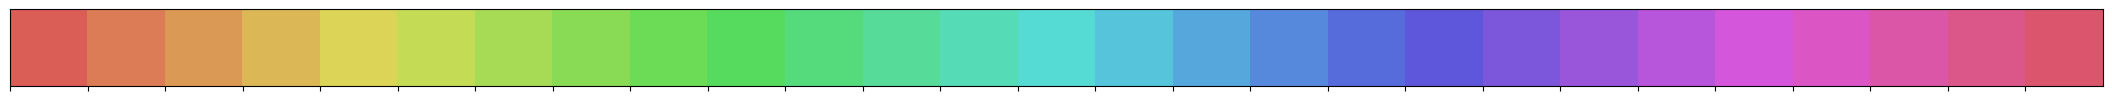

In [29]:
import seaborn as sns
import random
# store the label information
class_names_single = {
		'Normal':0, 
		'Smallgap':1, 
		'Largegap':2, 
		'Asreceived':3, 
		'No-Top':4,
		'No-Topsheet-II':5, 
		'Beamclip':6, 
		'defocus|1|':7, 
    	'defocus|2|':8,
		'low-power500':9,
		'high-power800':10, 
		'Edge-Weld':11,
		'High-Amp':12,
		'Low-Amp':13,
		'Low-Freq':14,
		'high-speed120':15,
		'low-speed80':16,
		'Cell':17,
		'Gas-10':18,
		'Gas-6':19,
		'Gas-2':20,
		'oil':21,
		'contaminate':22,
		'over-plastic/rivet':23,
		'mix-small-gap':24,
		'mix-large-gap':25,
		'crossJet-40':26
}
n_class = len(class_names_single) 
palette = sns.hls_palette(n_class) 
sns.palplot(palette)
marker_list = ['o', 'v', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd', '2', '3', '4', '8', 's', 'p', 'P', '*','s', 'p', 'P', '*', 'h', 'H']
random.seed(13)
random.shuffle(marker_list)

Shape of the reduced data: (358, 17)
Explained variance ratio: [0.36836854 0.23917613 0.12689993 0.06286867 0.04734691 0.03969648
 0.02913502 0.02459635 0.01538943 0.0096814  0.00658138 0.00556395
 0.00468023 0.0045871  0.00299672 0.00232406 0.00184301]


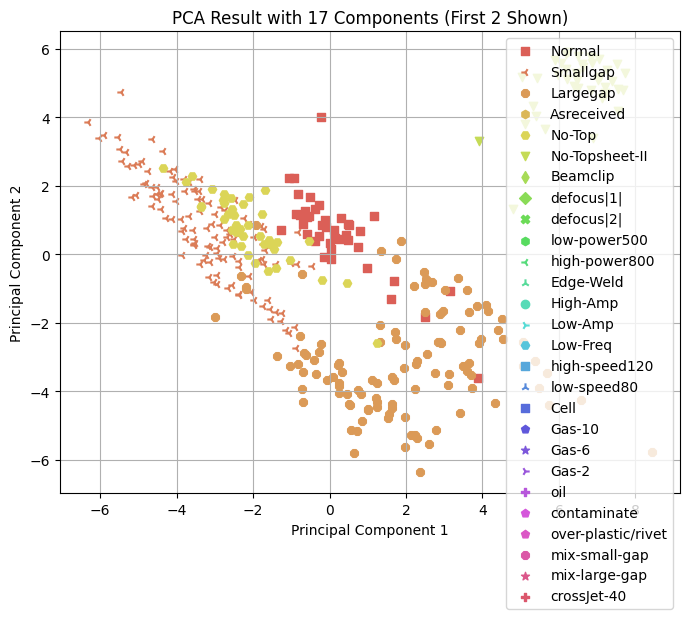

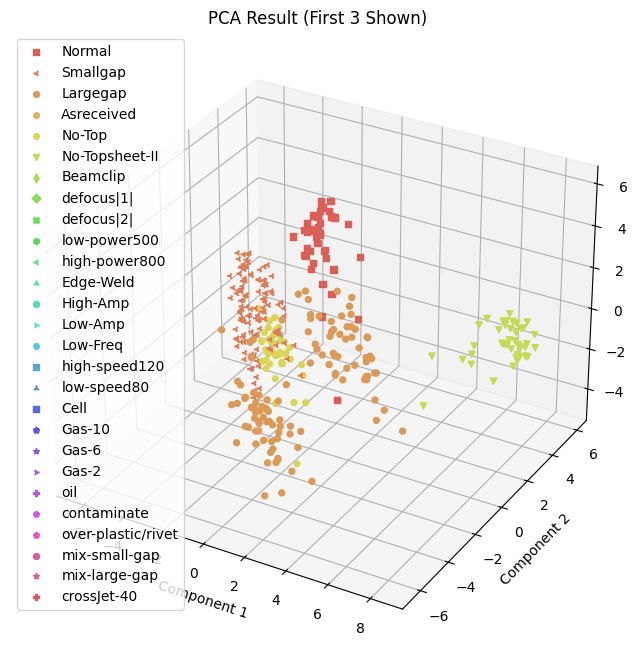

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def normalize_concatenated_features(concatenated_features):
    # calculate the mean and standard deviation across the concatenated data
    mean = np.mean(concatenated_features, axis=0)
    std = np.std(concatenated_features, axis=0)
    standardized_features = (concatenated_features - mean) / (std + 1e-8)  
    return standardized_features, mean, std

def concatenate_features(features):
    return np.concatenate([features[key] for key in features], axis=0)

def standardize_new_data_concatenated(new_data, mean, std):
    standardized_data = (new_data - mean) / (std + 1e-8) 
    return standardized_data

def create_pca_input_and_labels(class_names,features,mean=0,std=0,newdata=False):

    # mapping between feature names and their corresponding label values
    feature_label_mapping = {k: v for k, v in class_names.items()}
    concatenated_features = concatenate_features(features)
    # standardize the concatenated feature array
    if (newdata==False):
        standardized_features, mean, std = normalize_concatenated_features(concatenated_features)
    else:
        standardized_features = standardize_new_data_concatenated(concatenated_features,mean,std)
        
    # a corresponding label array for the input
    labels = []
    current_index = 0
    for key, values in features.items():
        num_samples = values.shape[0]
        label_value = feature_label_mapping[key]
        labels.append(np.full((num_samples,), label_value))
        current_index += num_samples

    # Combine the labels
    input_y = np.concatenate(labels).astype(np.int64)
    return standardized_features, input_y, mean, std
# visualized classes
features = {
		'Normal':feature_normal, 
		'Smallgap':feature_smallgap, 
		'Largegap':feature_largegap, 
		'No-Top':feature_notop,
		'No-Topsheet-II':feature_notop2, 
}
use_list = [1,32,34,5,9,12,13,47,17,20,25,27,37,41,56,49,63,65,79,66,72,73,77,89,81,91,93,96,97,98,99]
use_list = [1,41,43,5,9,12,13,56,17,20,25,34,27,46,50,65,58,74,72,77,81,83,97,84,90,91,95,107,99,109,111,117,120]

pca_feature_use, input_y,mean,std = create_pca_input_and_labels(class_names_single,features)
labels = input_y.copy()
colors = palette
scaler = StandardScaler()
pca = PCA(0.99)
principal_components = pca.fit_transform(pca_feature_use[:,use_list])
num_components = pca.n_components_
print("Shape of the reduced data:", principal_components.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
for name,i in class_names_single.items():
    plt.scatter(principal_components[labels == i, 0], principal_components[labels == i, 1], 
                alpha=1, color=colors[i], marker=marker_list[i],label=name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Result with {num_components} Components (First 2 Shown)')
plt.legend()
plt.grid(True)
plt.show()

# showing first three demensions
fig = plt.figure(figsize=(12, 8))
unique_labels = np.unique(labels)
ax = fig.add_subplot(111, projection='3d')
for name,i in class_names_single.items():
    ax.scatter(principal_components[labels == i, 0], principal_components[labels == i, 1], 
               principal_components[labels == i, 2], alpha=1, color=colors[i],marker=marker_list[i], label=name)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title(f'PCA Result (First 3 Shown)')
plt.legend()
plt.show()

## 3.Classification

In [39]:
import tensorflow.keras as keras
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras import layers, regularizers
from matplotlib.colors import LinearSegmentedColormap

checkpoint_filepath = './Train-simoid1.keras' # save model to this file
features={
        'Normal':np.concatenate((feature_asreceived,feature_NewAsreceived,feature_NewS1),axis=0),
        'Smallgap':feature_smallgap, 
        'Largegap':feature_largegap, 
        'No-Top':feature_notop,
        'No-Topsheet-II':feature_notop2, 
        'Beamclip':feature_B, 
        'defocus|2|':feature_Defocus2,
        'defocus|1|':feature_Defocus1,
        'Edge-Weld':feature_edgewhole,
        'oil':feature_oil_whole,
        'Gas-10':feature_gas10,
        'Gas-6':feature_gas6,
        'contaminate':feature_contaminate,
        'over-plastic/rivet':feature_overthings,
}
pca_feature_use, input_y,mean,std = create_pca_input_and_labels(class_names_single,features)
save_scalar = np.concatenate((mean.reshape(1, -1),std.reshape(1,-1)),axis=0)
np.save(checkpoint_filepath[:-3]+'.npy',save_scalar) # save the scaler for validation and future usage

use_list = [1,41,43,9,13,56,20,25,34,65,74,77,81,83,97,90,107,117,120]
principal_components = pca_feature_use.copy()[:,use_list]
feature_use = [i for i in range(principal_components.shape[1])]
data_length = len(feature_use)
input_x = principal_components[:,feature_use]
np.random.seed(13)
permutationTrain = np.random.permutation(input_x.shape[0])
input_x = input_x[permutationTrain]
input_y = input_y[permutationTrain]

num_classes = 27 
input_y = np.eye(num_classes)[input_y]
# split
vfoldSize = int(input_x.shape[0]/100*1)
xTest = input_x[0:vfoldSize]
yTest = input_y[0:vfoldSize]
xTrain = input_x[vfoldSize:input_x.shape[0]]
yTrain = input_y[vfoldSize:input_y.shape[0]]

model1 = keras.Sequential()
model1.add(layers.Dense(
    64 * 8, 
    input_shape=(data_length,), 
    activation='relu', 
))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(
    32 * 8, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.005)
))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(27, activation='sigmoid'))
adam = keras.optimizers.Adam(0.0001)
model1.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)
model1.summary()

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='loss',
    mode='min',
    verbose=1
)

# Train the model
history = model1.fit(
    xTrain, yTrain,
    batch_size=16,
    validation_data=(xTest, yTest),
    epochs=6000,
    verbose=1,
    callbacks=[checkpoint_callback]
)

# training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best model 
loaded_model = keras.models.load_model(checkpoint_filepath)
predictions = loaded_model.predict(xTest)
# apply a decision threshold to determine class presence
threshold = 0.2
predicted_labels = (predictions >= threshold).astype(int)

for i, (true_label, predicted) in enumerate(zip(yTest, predictions)):
    predicted_binary = (predicted >= threshold).astype(int)
    print(f'Sample {i}: True labels: {true_label}, Predicted binary: {predicted_binary}, Predicted confidences: {predicted}')
yTest_class = np.argmax(yTest,axis=1)
predicted_labels_class = np.argmax(predictions,axis=1)
accuracy = np.sum(predicted_labels_class == yTest_class) / (len(yTest)) * 100
print(f'Test accuracy: {accuracy}%')


cm1 = confusion_matrix(yTest_class, predicted_labels_class,labels= np.arange(27))
cm1_percent = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
# Combine both counts and percentages for display
combined_labels = np.empty_like(cm1, dtype=object)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        if (cm1[i,j] != 0):
            combined_labels[i, j] = f'{cm1[i, j]}\n({cm1_percent[i, j]:.1f}%)'
        else:
            combined_labels[i, j] = f' '
# confusion matrix plotting
plt.figure(figsize=(18,10))
colors = [
    (0.9, 0.98, 0.97, 0.5),  
    (0.49, 0.67, 0.81, 0.8),  
    (0.29, 0.45, 0.53, 1)    
]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(
    cm1_percent,
    annot=combined_labels,
    fmt='',
    cmap=cmap,
    xticklabels=class_names_single.values(),
    yticklabels=class_names_single.values(),
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    linecolor='#AEBFCE',    
    linewidths=0.5      
)
plt.xticks(rotation=70, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,507 (580.11 KB)

 Trainable params: 148,507 (580.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6000
65/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0511 - loss: 2.2940     
Epoch 1: loss improved from inf to 2.15873, saving model to ./Train-simoid1.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0531 - loss: 2.2816 - val_accuracy: 0.1818 - val_loss: 1.8838
Epoch 2/6000
43/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1412 - loss: 1.8308 
Epoch 2: loss improved from 2.15873 to 1.67501, saving model to ./Train-simoid1.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1431 - loss: 1.7845 - val_accuracy: 0.2727 - val_loss: 1.3995
Epoch 3/6000
47/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2112 - loss: 1.3807 
Epoch 3: loss improved from 1.67501 to 1.28339, saving model to ./Train-simoid1.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 1.3548 - val_accuracy: 0.4545 - val_loss: 1.0881
Epoch 4/6000
41/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3142 - loss: 1.1055 
Epoch 4: loss improved from 1.28339 to 1.02153, s

KeyboardInterrupt: 

## 4. Value Prediction

In [16]:
# load the strength 
import pandas as pd
import math


file_path = './Operation-DataBase-value.xlsx'  # replace with the used datasheet

# read the coach peel strength
df = pd.read_excel(file_path, sheet_name='Coach Peel Strength')  
coach_peel = df.set_index("Sample Label#")[["Sub-Project-Label","Peak Load (N)", "Extension at Peak Load (mm)"]].to_dict(orient="index")
 
# read the tensild strength
df = pd.read_excel(file_path, sheet_name='Tensile Strength')  
tensile_strength = df.set_index("Sample Label#")[["Sub-Project-Label","Peak Load (N)", "Extension at Peak Load (mm)"]].to_dict(orient="index")

# create the sample-result ID pairs, since the value is indexed by sample ID, but the signals are indexed by result ID
df = pd.read_excel(file_path, sheet_name='Master-BusBar Weld-F&K',skiprows=1)  
sample_2result = df.set_index("Sample Label#")["Result ID #"].to_dict()
sample_2result = {key: 0 if math.isnan(value) else int(value) for key, value in sample_2result.items()}

In [11]:
""" 
	to get the array which looks like "{6000:array of the feature}, the index is result ID here"
"""
import os
import numpy as np

raw_file_path = './All_new_0604'
feature_path = './Good_features4'
# List of folder names in path1
folders = os.listdir(raw_file_path)
file2array = {}
for folder in folders:
    folder_path = os.path.join(raw_file_path, folder)
    if os.path.isdir(folder_path):
        # Load the corresponding npy file
        npy_file = os.path.join(feature_path, f'{folder}.npy')
        if os.path.exists(npy_file):
            npy_array = np.load(npy_file)
            excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
            if len(excel_files) == npy_array.shape[0]:
                # Create the mapping of filenames to numpy array rows
                for i, excel_file in enumerate(excel_files):
                    file2array[int(excel_file[:-15])] = npy_array[i]

                print(f'Mapped data for folder {folder}')
            else:
                print(f'Number of Excel files does not match the number of rows in the numpy array for folder {folder}')
        else:
            print(f'npy file for folder {folder} not found')


Mapped data for folder 8_2_24_Blind Tests Group 2
Mapped data for folder blind test
Number of Excel files does not match the number of rows in the numpy array for folder blindtest2-lowfreq
Mapped data for folder Highpower&Defocus+2
Mapped data for folder Highpower&Edgeweld
Mapped data for folder Highpower&Gap0.4
Mapped data for folder Highpower&Gap0.8
Mapped data for folder Lowpower&Asreceived
Mapped data for folder Mix-Gap_0.2
Mapped data for folder Mix-Gap_0.2_Ramp
Mapped data for folder Mix-Gap_0.4
Mapped data for folder Mix-Gap_0.4_Ramp
Mapped data for folder Mix-Gap_0.8
Mapped data for folder Mix-Gap_0.8_Ramp
Mapped data for folder Mix-LP500
Mapped data for folder Mix-LP800
Mapped data for folder Mix-No_TopSheet
Mapped data for folder Mix-Speed_120
Mapped data for folder Mix-Speed_80
Mapped data for folder New-Asreceived
Mapped data for folder New-S1
Mapped data for folder S1-
Mapped data for folder S1-Asreceived
Mapped data for folder S1-Beamclipping0
Mapped data for folder S1-Be

In [12]:
# add the power, speed, amp, and freq features to each feature array (keys are the results IDs)
def update_values(d):
    power = 0.65
    speed = 1
    amp = 360
    freq = 1300
    for key, value in d.items():
        if 5757<=key<=5797:
            d[key] = np.append(value,[power,speed,160,freq])
        elif 5798<= key <=5838:
            d[key] = np.append(value,[power,speed,560,freq])
        elif 5839<= key <=5879:
            d[key] = np.append(value,[power,speed,720,freq])
        elif 5880<= key <=5920:
            d[key] = np.append(value,[power,speed,amp,900])
        elif 5921<= key <=5961:
            d[key] = np.append(value,[power,speed,amp,1700])
        elif 205<= key <=246:
            d[key] = np.append(value,[0.8,speed,amp,freq])
        elif 247<= key <=261:
            d[key] = np.append(value,[0.5,speed,amp,freq])
        elif 375<= key <=415:
            d[key] = np.append(value,[power,0.8,amp,freq])
        elif 319<= key <=359:
            d[key] = np.append(value,[power,1.2,amp,freq])
        else:
            d[key] = np.append(value,[power,speed,amp,freq])
# Update the dictionary
update_values(file2array)


In [13]:
# replace the result IDs with sample IDs
sample_to_array_mapping = {}
for sample_id, result_id in sample_2result.items(): 
    if result_id in file2array.keys():
        sample_to_array_mapping[sample_id] = file2array[result_id]


In [14]:
from keras.callbacks import ModelCheckpoint
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.callbacks import Callback

checkpoint_filepath = './Train-MLP-coachpeel-shap.keras' # save model to this file

class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.val_r2 = []
        self.val_rmse = []

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = self.model.predict(x_val)        
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))        
        logs['val_r2'] = r2
        logs['val_rmse'] = rmse
        self.val_r2.append(r2)
        self.val_rmse.append(rmse)
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch + 1}: val_r2: {r2:.4f} - val_rmse: {rmse:.4f}')
X = []
y = []
ids = []
cat_label = []

use_data = coach_peel # cahnge this
for sample_id in sample_to_array_mapping:
    if sample_id in use_data:
        X.append(sample_to_array_mapping[sample_id])
        y.append(use_data[sample_id]["Peak Load (N)"])
        ids.append(sample_id)
        cat_label.append(use_data[sample_id]["Sub-Project-Label"])
unique_labels = list(set(cat_label))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '2', '3', '4', '8']
palette = sns.hls_palette(len(unique_labels)) 
shapes = {label: markers[i % len(markers)] for i, label in enumerate(unique_labels)}
colors_dict = {label: palette[i] for i, label in enumerate(unique_labels)}

features = np.array(X)
input_y = np.array(y)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
xx = scaler_X.fit_transform(features)
yy = scaler_y.fit_transform(input_y.reshape(-1,1)).flatten()

use_list = [1,41,43,5,9,12,13,56,17,20,25,34,27,46,50,65,58,74,72,77,81,83,97,84,90,91,95,107,99,109,111,117,120,123,124,125,126]
np.random.seed(13)
indices = np.random.permutation(xx.shape[0])
input_x = xx[:,use_list][indices]
input_y = yy[indices]
id_label = np.array(ids)[indices]
class_label = np.array(cat_label)[indices]
vfoldSize = int(input_x.shape[0]/100*1)
xTest = input_x[0:vfoldSize]
yTest = input_y[0:vfoldSize]
idTest = id_label[0:vfoldSize]
class_Test = class_label[0:vfoldSize]
xTrain = input_x[vfoldSize:input_x.shape[0]]
yTrain = input_y[vfoldSize:input_y.shape[0]]
idTrain = id_label[vfoldSize:input_y.shape[0]]
class_Train = class_label[vfoldSize:input_y.shape[0]]
validation_data = (xTest, yTest)
validation_data = (xTrain, yTrain)
metrics_callback = MetricsCallback(validation_data=validation_data)
data_length = input_x.shape[1]

#  the model
model1 = Sequential()
model1.add(layers.Dense(
    64 * 8, 
    input_shape=(data_length,), 
    activation='relu', 
))
model1.add(layers.Dense(
    32 * 8, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.005)
))
model1.add(layers.Dense(
    32 * 8, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.005)
))
model1.add(layers.Dropout(0.01))
model1.add(layers.Dense(1, activation='linear'))
adam = keras.optimizers.Adam(0.0002)
model1.compile(loss='mean_squared_error',
               optimizer=adam,
               metrics=['mean_squared_error'])
model1.summary()

# checkpoint callback
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                      save_best_only=True,
                                      monitor='val_mean_squared_error',
                                      mode='min',
                                      verbose=0)
history = model1.fit(xTrain, yTrain, batch_size=32, validation_data=(xTest, yTest), epochs=800, verbose=0,callbacks=[checkpoint_callback,metrics_callback])
loaded_model = keras.models.load_model(checkpoint_filepath)
use_x, use_y,cid,cclass = xTrain, yTrain, idTrain,class_Train
predictions = loaded_model.predict(use_x)

# compute differences and identify samples with the largest differences
differences = np.abs(predictions.flatten() - use_y)

# calculate the % threshold for each element in use_y
thresholds = 0.2 * use_y

# Find indices where the difference is within 5% of the use_y values
percent_indices = np.where(differences >= thresholds)[0]

# sort the indices based on the differences if needed
#sorted_within_5_percent_indices = percent_indices[np.argsort(differences[percent_indices])]

# Plotting
plt.figure(figsize=(10, 8))
for i in range (use_x.shape[0]):
    prediction_sample = predictions[i]
    truth_sample = use_y[i]
    current_id = cid[i]
    current_class = cclass[i]
    shape = shapes[current_class]
    color = colors_dict[current_class]
    plt.scatter(truth_sample, prediction_sample, label=current_class if i in percent_indices else "", marker=shape, color=color)
for idx in percent_indices:
    plt.annotate(cid[idx], (use_y[idx], predictions[idx]), textcoords="offset points", xytext=(1, 10), ha='center', fontsize=8)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot([use_y.min(), use_y.max()], [use_y.min(), use_y.max()], color='red', lw=2, linestyle='--')
plt.xlabel('True Peak Load (N)')
plt.ylabel('Predicted Peak Load (N)')
plt.title('')
plt.show()

c:\Users\Zhao_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,833 (847.00 KB)

 Trainable params: 216,833 (847.00 KB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
10/10 ━━━━━━━━━━━━━━

KeyboardInterrupt: 